In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import cross_val_score
from scipy.stats import chi2_contingency
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import optuna

import shap

from catboost import CatBoostClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_csv('./hotel_booking.csv')
data['equal_room'] = (data['reserved_room_type'] == data['assigned_room_type']).astype(int)
data['on_waiting_list'] = (data['days_in_waiting_list'] > 0).astype(int)
data['from_company'] = (data['company'] != '0').astype(int)

sns.set_theme(style='darkgrid', palette='deep')

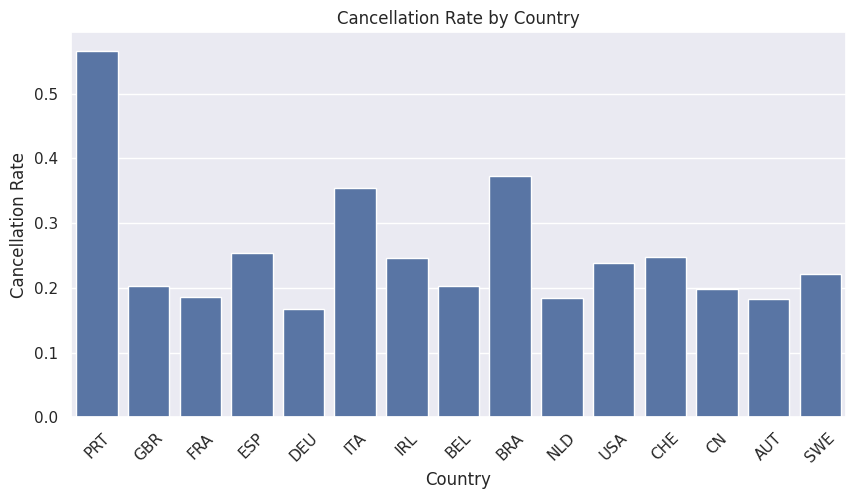

In [8]:
d = pd.crosstab(data['country'], data['is_canceled'])
d['total'] = d.sum(axis=1)
d['frac'] = d[1] / d['total']
d = d.sort_values('total', ascending=False)
fig = plt.figure(figsize=(10, 5))
sns.barplot(x=d.index[:15], y=d['frac'][:15])
plt.ylabel('Cancellation Rate')
plt.xlabel('Country')
plt.title('Cancellation Rate by Country')
_ =plt.xticks(rotation=45)

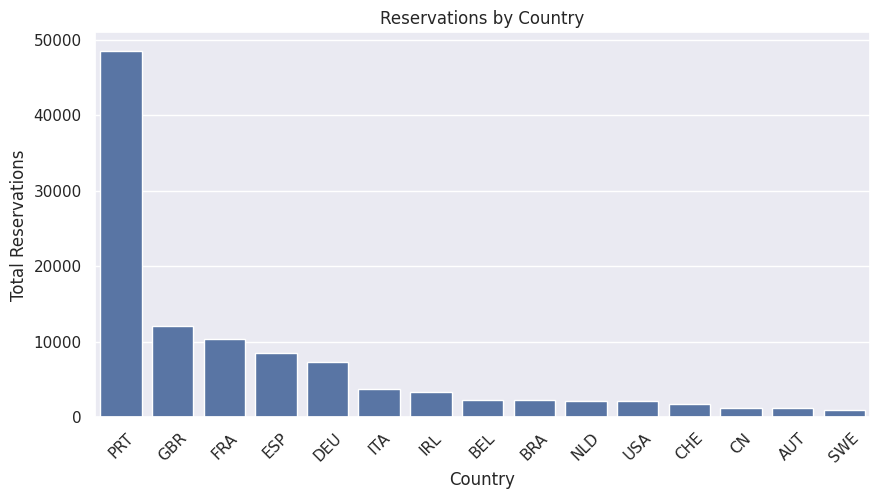

In [9]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(x=d.index[:15], y=d['total'][:15])
plt.ylabel('Total Reservations')
plt.xlabel('Country')
plt.title('Reservations by Country')
_ =plt.xticks(rotation=45)

          hotel  is_canceled
0    City Hotel     0.417270
1  Resort Hotel     0.277634


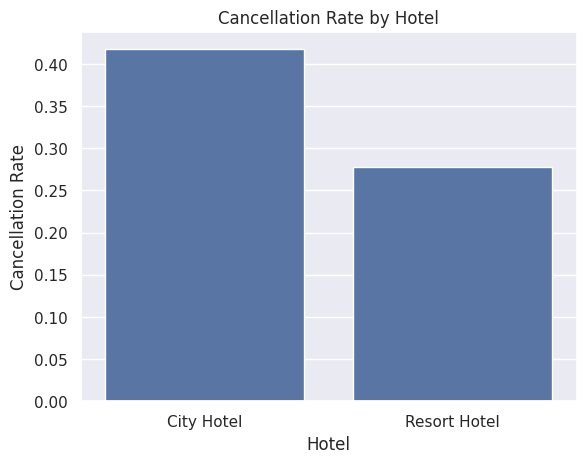

In [10]:
temp = data.copy()
temp = temp.groupby(['hotel'], as_index=False).agg({'is_canceled':'mean'})

sns.barplot(x=temp['hotel'], y=temp['is_canceled'])
plt.ylabel('Cancellation Rate')
plt.xlabel('Hotel')
plt.title('Cancellation Rate by Hotel')
print(temp)

     customer_type  waitlisted  is_canceled
0         Contract           0     0.309921
1         Contract           1     0.000000
2            Group           0     0.102787
3            Group           1     0.000000
4        Transient           0     0.393836
5        Transient           1     0.992161
6  Transient-Party           0     0.257945
7  Transient-Party           1     0.202424


Text(0.5, 0, 'Customer Type')

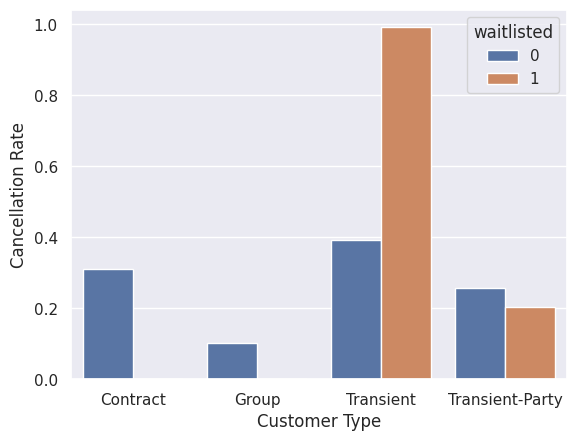

In [11]:
waitlist_df = data.copy()
waitlist_df['waitlisted'] = (waitlist_df['days_in_waiting_list'] > 0).astype(int)

waitlist_df = waitlist_df.groupby(['customer_type', 'waitlisted'],as_index=False).agg({'is_canceled':'mean'})
print(waitlist_df)
sns.barplot(x=waitlist_df['customer_type'], y=waitlist_df['is_canceled'], hue=waitlist_df['waitlisted'])
plt.ylabel('Cancellation Rate')
plt.xlabel('Customer Type')

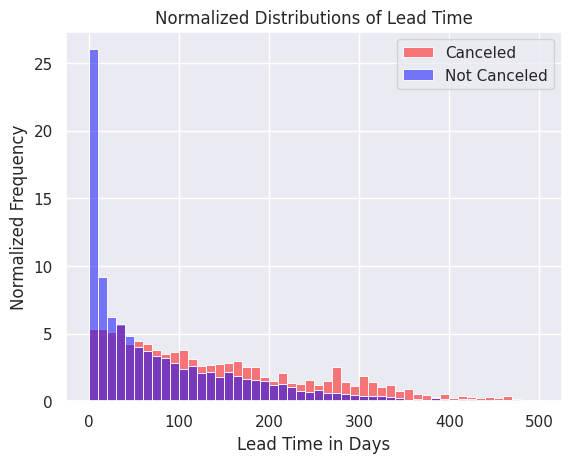

In [28]:
sns.histplot(data.loc[data['is_canceled']==1,'lead_time'], binwidth=10, binrange=(0,500), color='red', stat='percent', alpha=0.5, label='Canceled')
sns.histplot(data.loc[data['is_canceled']==0,'lead_time'], binwidth=10, binrange=(0,500), color='blue', stat='percent', alpha=0.5, label='Not Canceled')
plt.xlabel('Lead Time in Days')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Distributions of Lead Time')
plt.legend()

<Axes: xlabel='lead_time', ylabel='Percent'>

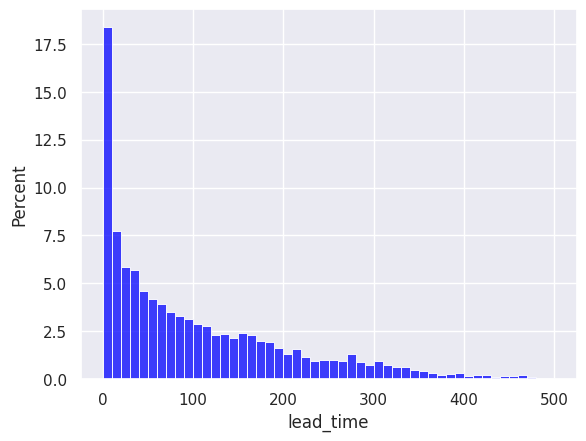

In [21]:
sns.histplot(data['lead_time'], binwidth=10, binrange=(0,500), color='blue', stat='percent')

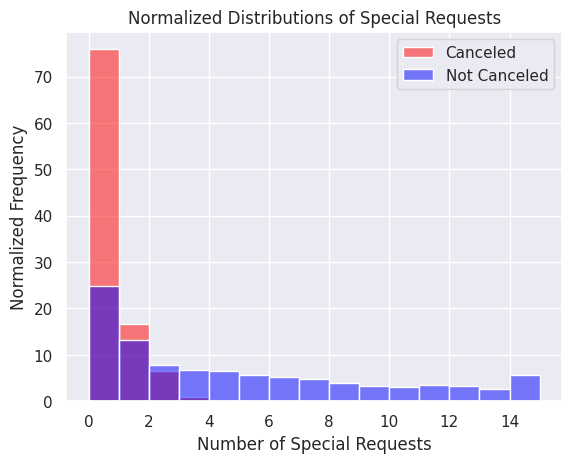

In [29]:
sns.histplot(data.loc[data['is_canceled']==1,'total_of_special_requests'], binwidth=1, binrange=(0,15), color='red', stat='percent', alpha=0.5, label='Canceled')
sns.histplot(data.loc[data['is_canceled']==0,'lead_time'], binwidth=1, binrange=(0,15), color='blue', stat='percent', alpha=0.5, label='Not Canceled')
plt.xlabel('Number of Special Requests')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Distributions of Special Requests')
plt.legend()

In [ ]:
sns.barplot(data[])